# ImageDataGenerator를 이용한 데이터 증강

In [22]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

In [23]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x.reshape(-1, 28, 28, 1) / 255.
test_x = raw_test_x.reshape(-1, 28, 28, 1)/255.

train_y = raw_train_y
test_y = raw_test_y

In [24]:
model = keras.Sequential()
model.add(Input((28,28,1)))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()




Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 3136)              0         
                                                                 
 dense_12 (Dense)            (None, 10)               

# ImageDataGenerator를 사용해서 학습

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      validation_split=0.2,
).flow(train_x, train_y, batch_size=32, subset="training")

valid_data_generator = ImageDataGenerator(
      validation_split=0.2,
).flow(train_x, train_y, batch_size=32, subset="validation")

test_data_generator = ImageDataGenerator().flow(test_x, test_y, batch_size=32)

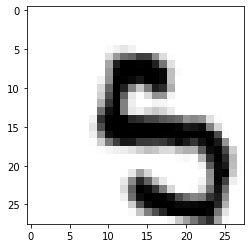

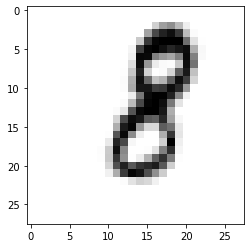

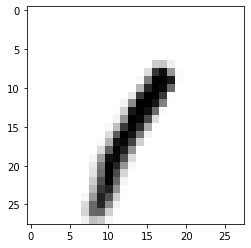

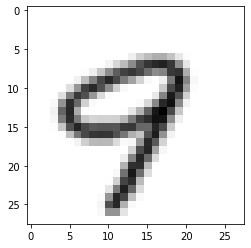

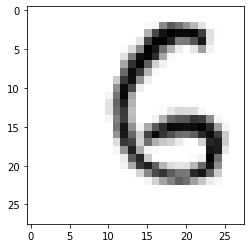

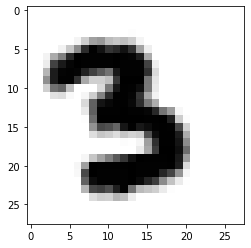

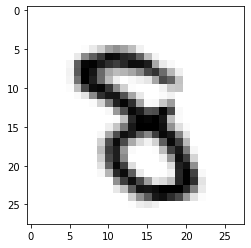

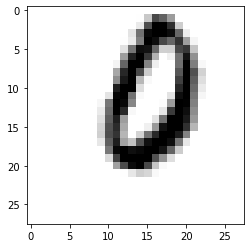

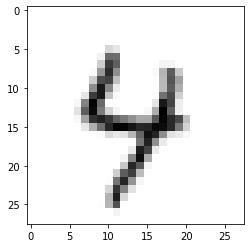

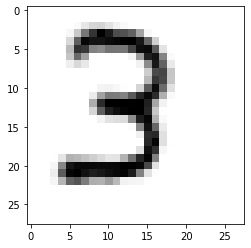

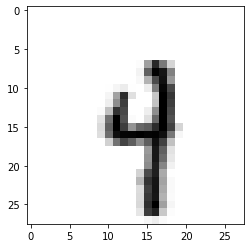

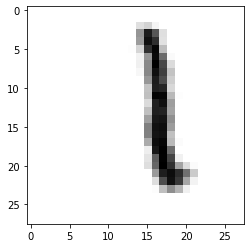

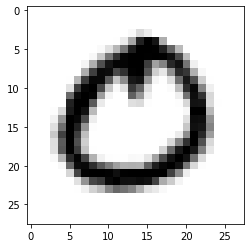

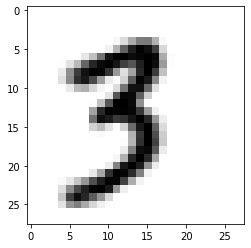

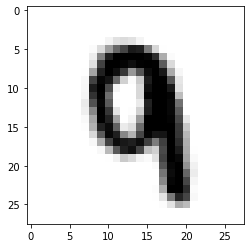

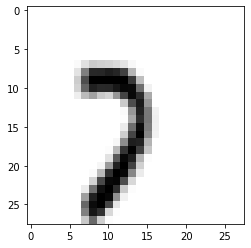

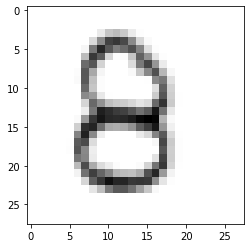

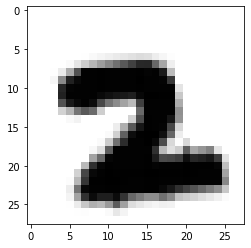

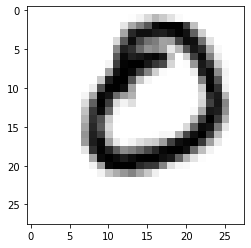

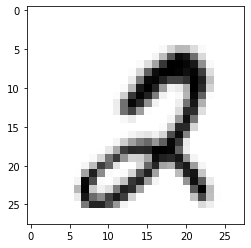

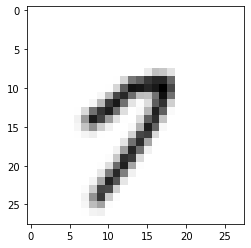

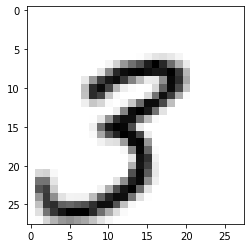

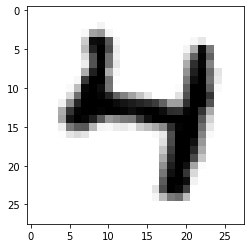

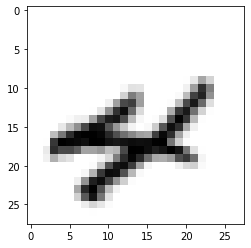

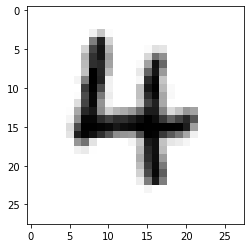

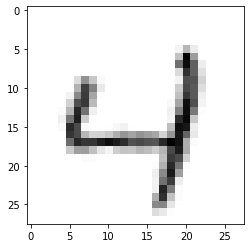

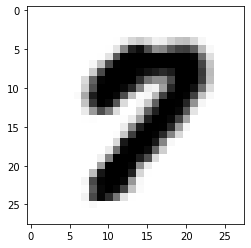

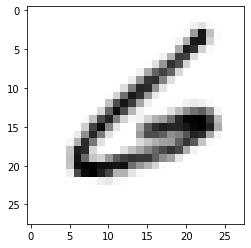

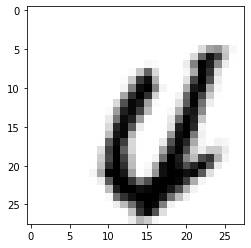

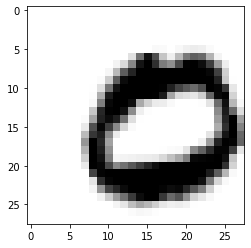

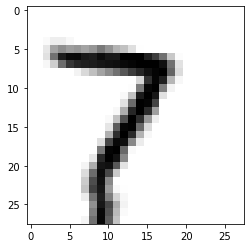

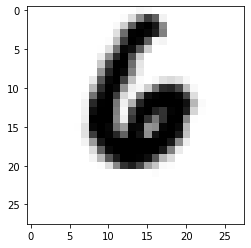

In [26]:
batch_x, batch_y = next(train_data_generator)
for a_x in batch_x:
  plt.imshow(a_x.squeeze(), cmap=plt.cm.binary)
  plt.show()

In [27]:
model.fit(train_data_generator, validation_data=valid_data_generator, epochs=1, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_data_generator)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=1)

print(predicted)


313/313 [==============================] - 1s 3ms/step - loss: 0.1440 - accuracy: 0.9544
loss= 0.14403121173381805
acc= 0.9544000029563904
[3 6 6 ... 1 0 2]


# 증강한 데이터 다시 numpy로 받아서

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      validation_split=0.2,
).flow(train_x, train_y, batch_size=99999999, subset="training")

train_x, train_y = next(train_data_generator)


valid_data_generator = ImageDataGenerator(
      validation_split=0.2,
).flow(train_x, train_y, batch_size=999999999, subset="validation")

valid_x, valid_y = next(valid_data_generator)

In [32]:
model.fit(train_x, train_y, validation_data=(valid_x, valid_y), epochs=1, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_data_generator)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_data_generator)
predicted = np.argmax(y_, axis=1)

print(predicted)


313/313 [==============================] - 1s 3ms/step - loss: 0.1035 - accuracy: 0.9684
loss= 0.10349514335393906
acc= 0.9684000015258789
[2 1 2 ... 0 2 1]
